In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('movies_metadata.csv')


/var/folders/qg/gy9qrls91xv8dq6c7q9_48th0000gn/T/ipykernel_8327/3283707416.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


In [3]:
# Remove useless columns from data
columns_to_drop = ['adult', 'belongs_to_collection', 'homepage', 'id', 'imdb_id', 'original_title', 'overview', 'poster_path', 'status', 'tagline', 'title', 'video']
df = df.drop(columns_to_drop, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45466 non-null  object 
 1   genres                45466 non-null  object 
 2   original_language     45455 non-null  object 
 3   popularity            45461 non-null  object 
 4   production_companies  45463 non-null  object 
 5   production_countries  45463 non-null  object 
 6   release_date          45379 non-null  object 
 7   revenue               45460 non-null  float64
 8   runtime               45203 non-null  float64
 9   spoken_languages      45460 non-null  object 
 10  vote_average          45460 non-null  float64
 11  vote_count            45460 non-null  float64
dtypes: float64(4), object(8)
memory usage: 4.2+ MB


In [4]:
df['release_date'] = df['release_date'].str[0:4] 


In [6]:
df['release_date'] = pd.to_numeric(df['release_date'], errors='coerce')
data_date = df[(df['vote_average'] > 0)]
not_null = pd.notnull(data_date['release_date'])
data_date = data_date[not_null]


In [8]:
data_date.sort_values(by=['release_date'])

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
34940,0,"[{'id': 99, 'name': 'Documentary'}]",xx,0.480371,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",1874.0,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.0,19.0
34937,0,"[{'id': 99, 'name': 'Documentary'}]",en,0.327841,"[{'name': 'Palo Alto Stock Farm', 'id': 84748}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1878.0,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.2,25.0
41602,0,"[{'id': 99, 'name': 'Documentary'}]",en,0.229221,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1883.0,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",5.4,7.0
34933,0,"[{'id': 99, 'name': 'Documentary'}]",xx,1.184891,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1887.0,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",4.1,17.0
34934,0,"[{'id': 99, 'name': 'Documentary'}]",xx,0.212768,"[{'name': 'Whitley Partners', 'id': 48026}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1888.0,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44335,4000000,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 35,...",en,5.753444,"[{'name': 'BBC Films', 'id': 288}, {'name': 'N...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2017.0,0.0,15.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.7,29.0
43403,0,"[{'id': 35, 'name': 'Comedy'}]",en,7.299803,"[{'name': 'Pantelion Films', 'id': 58399}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2017.0,26251899.0,115.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",6.1,85.0
44336,0,"[{'id': 10402, 'name': 'Music'}, {'id': 99, 'n...",en,3.250568,[],[],2017.0,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,57.0
43405,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",en,1.223145,"[{'name': 'Revolution Films', 'id': 163}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2017.0,0.0,115.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.0,6.0


In [9]:
yearvote = data_date[['release_date', 'vote_average']]
yearvote = yearvote.sort_values(by=['release_date'])

In [10]:
yearvote

,release_date,vote_average
34940,1874.0,6.0
34937,1878.0,6.2
41602,1883.0,5.4
34933,1887.0,4.1
34934,1888.0,4.4
...,...,...
44335,2017.0,7.7
43403,2017.0,6.1
44336,2017.0,6.1
43405,2017.0,7.0


In [11]:
yv = yearvote.groupby(['release_date'])["vote_average"].mean().reset_index()

In [12]:
yv

,release_date,vote_average
0,1874.0,6.000000
1,1878.0,6.200000
2,1883.0,5.400000
3,1887.0,4.100000
4,1888.0,5.150000
...,...,...
128,2013.0,5.985801
129,2014.0,6.005657
130,2015.0,6.074170
131,2016.0,6.248227


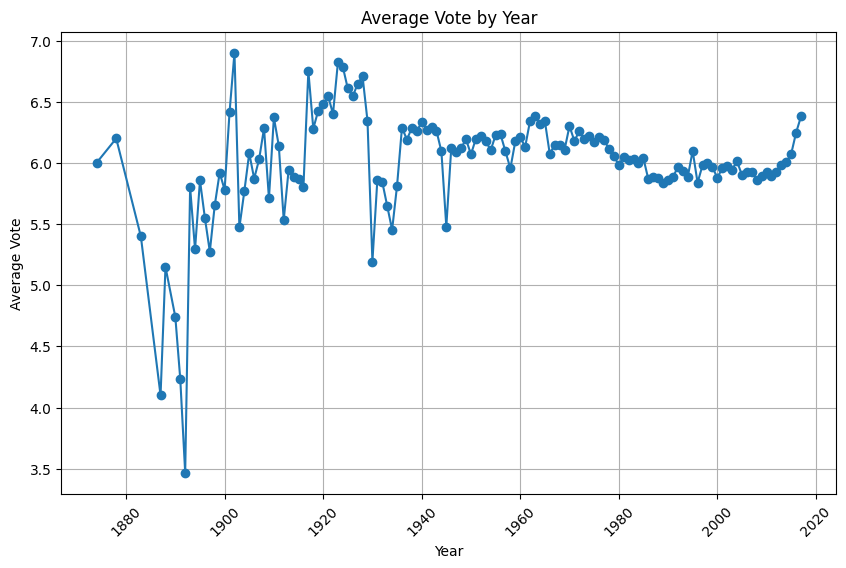

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(yv['release_date'], yv['vote_average'], marker='o')
plt.title('Average Vote by Year')
plt.xlabel('Year')
plt.ylabel('Average Vote')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [23]:
data_runtime = df[(df['runtime'] > 0) & (df['runtime'] <= 300) & (df['vote_average'] > 0)]
runtime_notnull = pd.notnull(data_runtime['runtime'])
data_runtime = data_runtime[not_null]

/var/folders/qg/gy9qrls91xv8dq6c7q9_48th0000gn/T/ipykernel_8327/2465592027.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_runtime = data_runtime[not_null]


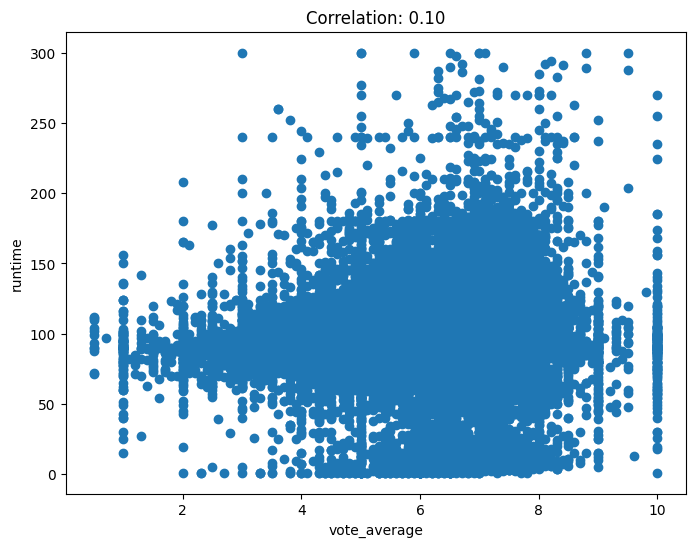

In [24]:
correlation_runtime = data_runtime[['vote_average', 'runtime']].corr().iloc[0, 1]
plt.figure(figsize=(8, 6))
plt.scatter(data_runtime['vote_average'], data_runtime['runtime'])
plt.title(f'Correlation: {correlation_runtime:.2f}')
plt.xlabel('vote_average')
plt.ylabel('runtime')
plt.show()

In [25]:
data_revenue = df[(df['revenue'] > 0) & (df['vote_average'] > 0)]

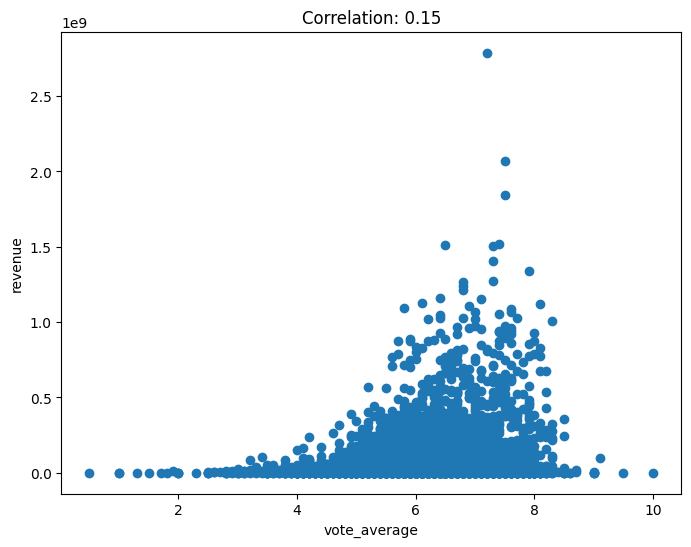

In [26]:
correlation_revenue = data_revenue[['vote_average', 'revenue']].corr().iloc[0, 1]
plt.figure(figsize=(8, 6))
plt.scatter(data_revenue['vote_average'], data_revenue['revenue'])
plt.title(f'Correlation: {correlation_revenue:.2f}')
plt.xlabel('vote_average')
plt.ylabel('revenue')
plt.show()

In [27]:
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
data_popularity = df[(df['popularity'] > 0) & (df['vote_average'] > 0)]

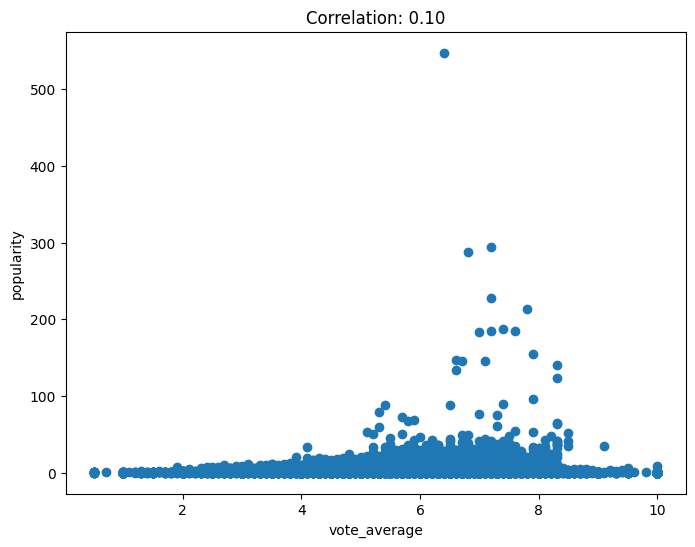

In [28]:
# Calculate correlation and create scatter plot for 'popularity' and 'vote_average'
correlation_popularity = data_popularity[['vote_average', 'popularity']].corr().iloc[0, 1]
plt.figure(figsize=(8, 6))
plt.scatter(data_popularity['vote_average'], data_popularity['popularity'])
plt.title(f'Correlation: {correlation_popularity:.2f}')
plt.xlabel('vote_average')
plt.ylabel('popularity')
plt.show()